# **Flipkart Project**    

**Project Type**- Classification/ Supervised Machine Learning

**Contribution**- Individual

**Submitted by**- Khushi Dusad

# **Project Summary -**

### **Objective**
Customer satisfaction is a key driver of success in e-commerce. In this project, I have focused on analyzing and predicting customer satisfaction levels for Flipkart using machine learning. The goal was to help identify what drives satisfaction and where service could be improved, ultimately aiding in better customer experience and retention strategies.

For this I followed the following steps:

### **Knowing your data**
I began by loading the dataset and performing an initial exploration, including checking its shape, inspecting the first few rows, and identifying duplicate or missing values. Visualizing missing data with a heatmap helped understand the completeness of the dataset.

### **Understanding your variables**
Following are the features of the dataset:
`Unique id`, `channel_name`, `category`, `Sub-category`, `Customer Remarks`, `Order_id`, `order_date_time`, `Issue_reported at`, `issue_responded`, `Survey_response_Date`, `Customer_City`, `Product_category`, `Item_price`, `connected_handling_time`, `Agent_name`, `Supervisor`, `Manager`, `Tenure Bucket`, `Agent Shift`, `CSAT Score`.
I explored these variable in detail and also interpreted what each of these features meant.

### **Data Wrangling**
Data wrangling is done to make the dataset ready for analysis. In this step, I first created a copy of the dataset in order to preserve the actual dataset. Then, I dropped the `connection_handling_time` column because more than 99% of its values were null values. Then, I Removed null rows for the `Order_id` column to maintain data integrity. Then I converted all date columns from object to datetime format. I filled all the null values in `Customer Remarks`, `Customer_City`, `Product_category`, and `Item_price` with appropriate placeholders. I also cleaned textual data by removing whitespaces and converting text to lowercase.

### **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**
To visualize the data, I created 15 charts:

Distribution of CSAT Scores, Distribution of Channels, Distribution of Item Price, CSAT Scores by Shift, Tenure Bucket Distribution, Top 10 Sub-Categories with Most Complaints, CSAT Score vs Item Price, CSAT vs Product Category, Agent Shift vs Tenure Bucket, Sub-category Distribution by Category, Distribution of Product Categories, Top 10 Most Used Customer Remarks, Product Cateogry vs Sub Category, Correlation Heatmap, & Pair Plot.

 These visualizations helped reveal patterns and relationships in the data.

### **Hypothesis Testing**
Based on the visual insights, I formulated three hypotheses and conducted statistical tests to validate them, providing concrete conclusions about the data relationships.

### **Feature Engineering & Data Pre-processing**
I addressed missing values and outliers, performed categorical encoding, and processed textual data. Feature selection and scaling were applied, followed by splitting the data into training and testing sets. I also handled imbalanced data.

### **ML Model Implementation**
I implemented three models: Decision Tree, Random Forest, and Logistic Regression. Each model was evaluated using classification reports and confusion matrices. To enhance model performance, I applied cross-validation and hyperparameter tuning, ultimately improving prediction accuracy.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


#### **Problem Statement**: To Predict Flipkart Customer Satisfaction Scores Using Machine Learning Algorithms

#### **Context**:
In the highly competitive e-commerce space, delivering excellent customer service is crucial for sustaining growth and customer loyalty. Flipkart, as one of the largest e-commerce platforms, focuses on enhancing customer satisfaction to differentiate itself from competitors. The dataset in this project captures customer interactions, feedback, and satisfaction scores across various support channels at Flipkart.

#### **Goal**:
By analyzing these interactions, the goal is to identify key drivers of customer satisfaction, understand performance across different customer service teams, and develop strategies to improve the overall service experience.

#### **Expected Outcome**:
Understanding factors that influence customer satisfaction will allow Flipkart to not only resolve customer issues faster but also tailor its support strategies to meet diverse customer expectations. This will help in optimizing the performance of service agents and improving satisfaction metrics like the CSAT score, ultimately leading to increased brand loyalty and customer retention.




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [82]:
# Installing Packages
!pip install category_encoders contractions nltk eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.4 MB/s eta 0:00:00


In [87]:
# Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import category_encoders as ce
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score
import eli5
from eli5.sklearn import explain_weights
import joblib
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Loading the dataset
df = pd.read_csv('/content/Customer_support_data.csv')

### Dataset First View

In [4]:
# First look at the data
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [5]:
# Number of rows and columns in the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 85907 rows and 20 columns.


### Dataset Information

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


#### Missing Values/Null Values

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
print(f'Missing values:\n{missing_values[missing_values > 0]}')

Missing values:
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
dtype: int64


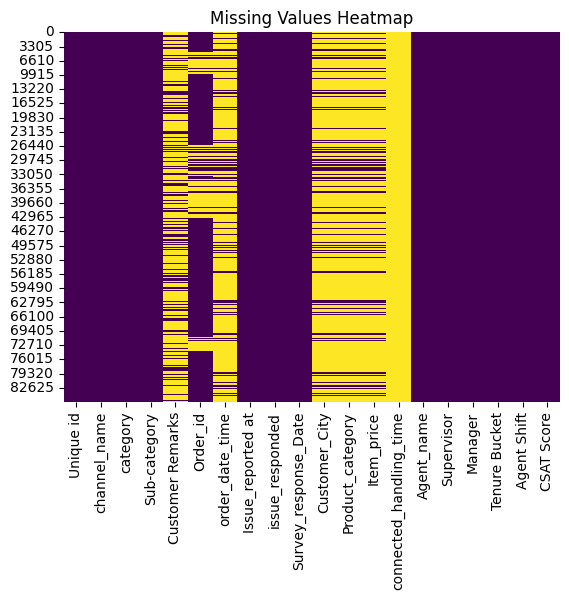

In [9]:
# Visualizing missing values using heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

* The Flipkart customer support dataset contains 85907 rows and 20 columns.
* Most fields are of object data type. There are also float and int fields.
* There are no duplicate rows in the dataset.
* Almost 66% values are missing for Customer Remarks.
* Almost 99% values are missing for connected_handling_time.
* Almost 80% values are missing for order_date_time, Customer_City, Product_category, & Item_price.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

- ```Unique id```- Unique identifier for each customer interaction or case
- ```channel_name```- Channel used by the customer to report an issue or give feedback (outcall, inbound, email)
- ```category```-	Main category of the issue or concern
- ```Sub-category```-	Sub-classification under the main category
- ```Customer Remarks```- Feedbacks or comments from the customer
- ```Order_id```-	Unique id for each order
- ```order_date_time```- Date and time when the order was placed
- ```Issue_reported```- Timestamp when the issue was reported
- ```issue_responded```- Timestamp when the issue was responded to
- ```Survey_response_Date```-	Date when the customer survey response was recorded
- ```Customer_City```-	City of the customer
- ```Product_category```-	Category of product involved in the issue
- ```Item_price```-	Price of the item associated with the issue
- ```connected_handling_time```-	Time taken to handle the connection
- ```Agent_name```-	Name of the agent who handled the case
- ```Supervisor```-	Name of the supervisor for the issue
- ```Manager```-	Name of the manager responsible for the process
- ```Tenure Bucket```-	Bucket representing the tenure related to the agent
- ```Agent Shift```- Shift timing of the agent (e.g., morning, afternoon, evening, etc.)
- ```CSAT Score```-	Customer Satisfaction Score (Target variable; ranges from 1 to 5)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Before data wrangling, we will make a copy of the original dataset in order to avoid unintentional changes to the original dataset
df_copy = df.copy()

In [14]:
# Having a look at the copy of the dataset
df_copy.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [15]:
# We will drop the connected_handling_time column since it has more than 99% of its values are null values
df_copy = df_copy.drop('connected_handling_time', axis = 1)

In [16]:
# Order_id column uniquely identifies every order and hence we will remove null rows for this column to maintain data integrity
df_copy = df_copy.dropna(subset=['Order_id'])

In [17]:
# We will convert all date columns from object to datetime format
date_cols = ["order_date_time", "Issue_reported at", "issue_responded"]
for col in date_cols:
    df_copy[col] = pd.to_datetime(df_copy[col], format ='%d/%m/%Y %H:%M', errors="coerce")

df_copy['Survey_response_Date'] = pd.to_datetime(df_copy['Survey_response_Date'], format='%d-%b-%y', errors='coerce')

In [18]:
# Customer Remarks is an essential feature in this dataset since we are focusing on Customer Satisfaction Score.
# We will find the number of null values in Customer Remarks
print("Number of null values in Customer Remarks: ", df_copy['Customer Remarks'].isnull().sum())

Number of null values in Customer Remarks:  45036


In [19]:
# There are many null values in this column so we will fill all the null values with "No Remark"
df_copy["Customer Remarks"].fillna("No Remark", inplace=True)
print("Number of null values in Customer Remarks: ", df_copy['Customer Remarks'].isnull().sum())

Number of null values in Customer Remarks:  0


In [20]:
# Removing leading and trailing white spaces and converting the strings to lowercase
df_copy['Customer Remarks'] = df_copy['Customer Remarks'].str.strip().str.lower()

In [21]:
# Finding the number of null values in Customer_City, Product_category, and Item_price
print("Number of null values in Customer_City: ", df_copy['Customer_City'].isnull().sum())
print("Number of null values in Product_category: ", df_copy['Product_category'].isnull().sum())
print("Number of null values in Item_price: ", df_copy['Item_price'].isnull().sum())

Number of null values in Customer_City:  50596
Number of null values in Product_category:  50479
Number of null values in Item_price:  50469


In [22]:
# Filling all these null values with appropriate values
df_copy["Customer_City"].fillna("Unknown", inplace=True)
df_copy["Product_category"].fillna("Not available", inplace=True)
df_copy["Item_price"].fillna(0, inplace=True)

In [23]:
# Again checking the number of null values in these columns
print("Number of null values in Customer_City: ", df_copy['Customer_City'].isnull().sum())
print("Number of null values in Product_category: ", df_copy['Product_category'].isnull().sum())
print("Number of null values in Item_price: ", df_copy['Item_price'].isnull().sum())

Number of null values in Customer_City:  0
Number of null values in Product_category:  0
Number of null values in Item_price:  0


### What all manipulations have you done and insights you found?

* Created a copy of the dataset in order to preserve the actual dataset.
* Dropped the ```connection_handling_time``` column because of >99% values being null values.
* Removed null rows for the ```Order_id``` column to maintain data integrity.
* Converted all date columns from object to datetime format
* Filled all the null values in `Customer Remarks`, `Customer_City`, `Product_category`, and `Item_price` with appropriate values as placeholders.
* Removed leading and trailing whitespaces and converted the string to lowercase in `Customer Remarks`.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

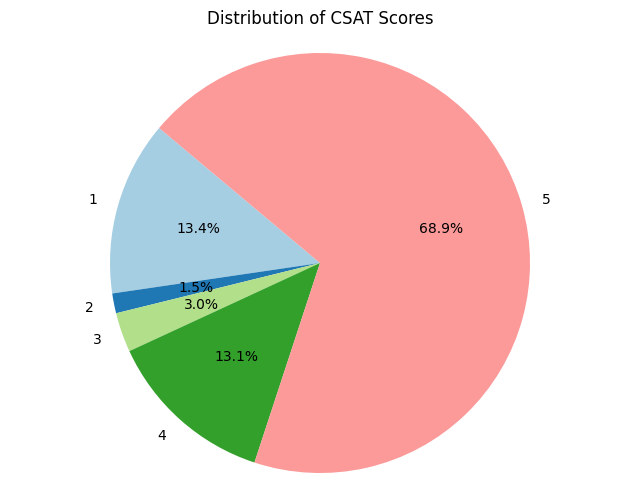

In [24]:
# Chart - 1 Distribution of CSAT Scores
csat_counts = df_copy['CSAT Score'].value_counts().sort_index()
csat_percent = csat_counts / csat_counts.sum() * 100 # Percentage of each score in the dataset
plt.figure(figsize=(8, 6))
plt.pie(csat_percent, labels=csat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of CSAT Scores')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to understand the overall satisfaction level distribution.

##### 2. What is/are the insight(s) found from the chart?

The dataset is highly imbalanced with almost 69% of the CSAT Scores being 5 while 2 & 3 contribute to less than 5% of the scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of the CSAT Scores being high (4 or 5) validates the current strategies.

The regions with low CSAT Scores need improvement.

#### Chart - 2

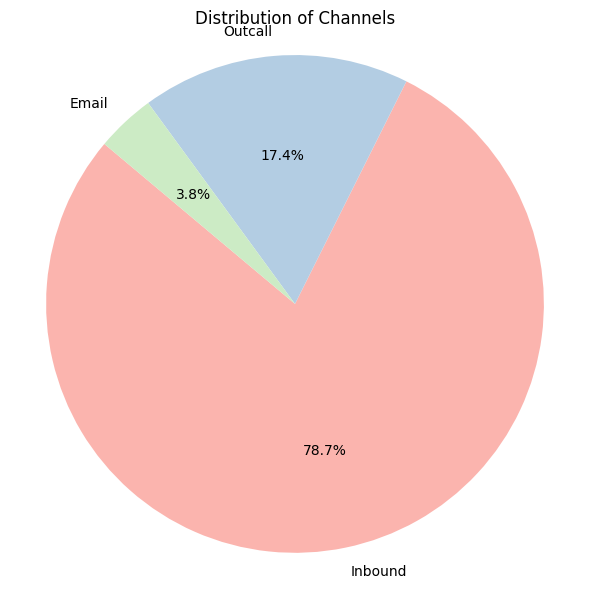

In [25]:
# Chart - 2 Distribution of Channels
channel_distribution = df_copy['channel_name'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(channel_distribution, labels=channel_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Channels')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked this chart to analyze the distribution of the channels that customers use to provide feedback or report an issue.

##### 2. What is/are the insight(s) found from the chart?

Majority of the feedbacks (78.7%) or issues are recorded from inbound accounts.

Email is the least used channel used by the customers with only 3.8% feedbacks being recorded from emails.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company can allocate resources more effectively to the primary channels of communication to enhance the operational efficiency of these channels and hence improving customer satisfaction.

Lower preference for email channel might indicate service issues in that channel which can lead to customer dissatisfaction.

#### Chart - 3

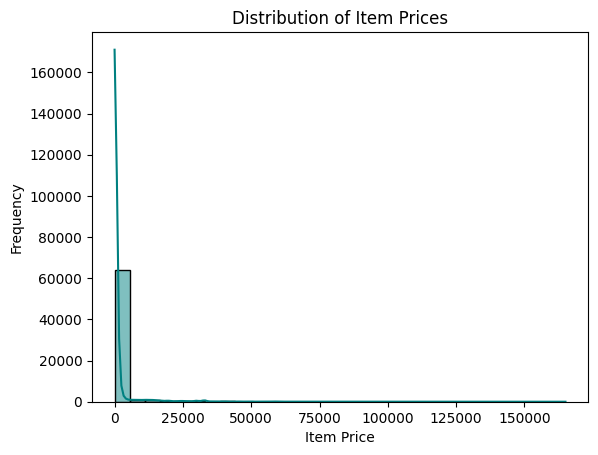

In [26]:
# Chart - 3 Distribution of Item Price
sns.histplot(df_copy['Item_price'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to understand the range of product prices.



##### 2. What is/are the insight(s) found from the chart?

Data is right-skewed / positively skewed due to the presence of outliers or premium products.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help to analyze the pricing strategies which might also affect the CSAT Scores.

#### Chart - 4

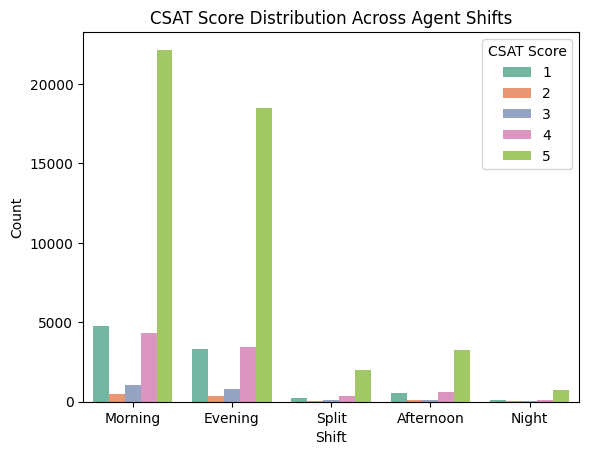

In [27]:
# Chart - 4 CSAT Scores by Shift
sns.countplot(data=df_copy, x='Agent Shift', hue='CSAT Score', palette='Set2')
plt.title('CSAT Score Distribution Across Agent Shifts')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart to see if shift timings impact satisfaction.

##### 2. What is/are the insight(s) found from the chart?

More customer interactions happen during morning and evening shifts as compared to the other shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The busier shifts can be leveraged further by more staffing to handle cases efficiently.

The other shifts might be underperforming, which could lead to negative customer experience.

#### Chart - 5

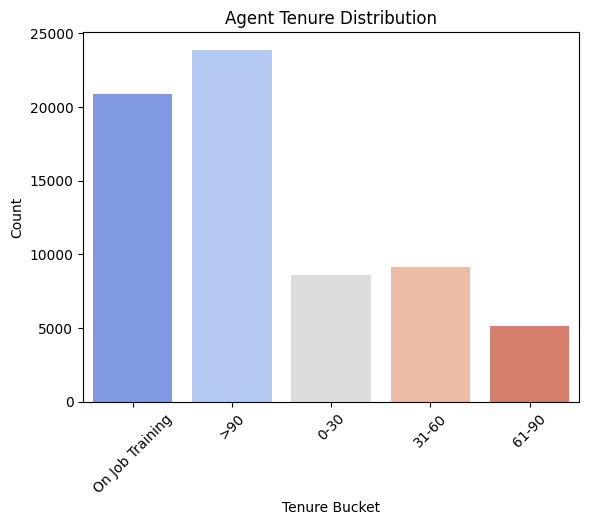

In [28]:
# Chart - 5 Tenure Bucket Distribution
sns.countplot(data=df_copy, x='Tenure Bucket', palette='coolwarm')
plt.title('Agent Tenure Distribution')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to analyze agent tenure distribution.

##### 2. What is/are the insight(s) found from the chart?

Most agents fall under on-job training and >90 days tenure buckets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A strong base of experienced agents can ensure efficient issue resolution and knowledge transfer.

A high number of agents in training may lead to inconsistent service quality, affecting customer satisfaction.

#### Chart - 6

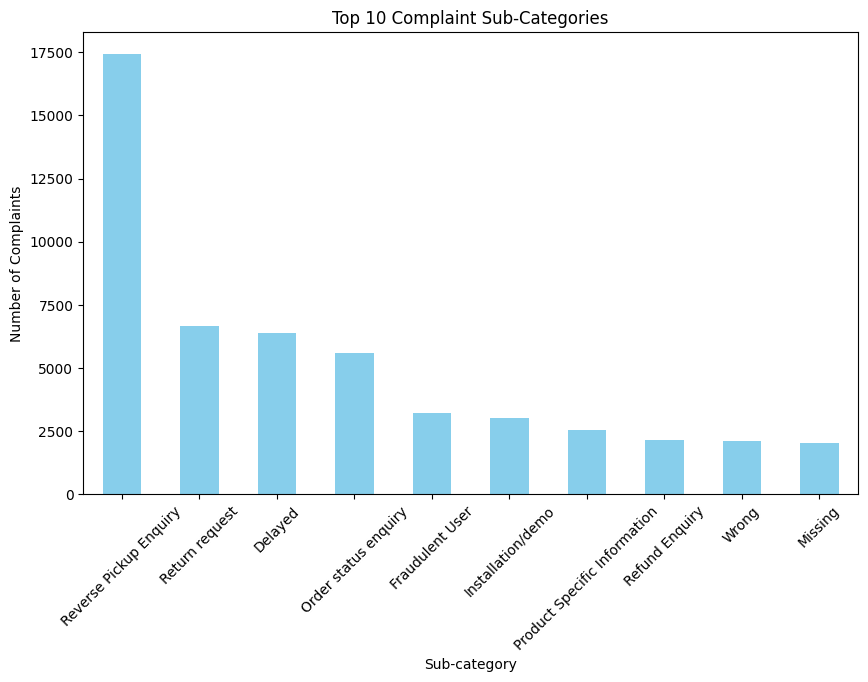

In [29]:
# Chart - 6 Top 10 Sub-Categories with Most Complaints
plt.figure(figsize=(10,6))
df_copy['Sub-category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Complaint Sub-Categories')
plt.xlabel('Sub-category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to determine the top 10 sub categories with most complaints.

##### 2. What is/are the insight(s) found from the chart?

We get to know that most customer interactions/complaints are regarding returns and there are fewer complaints about item being missing or wrong.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying the key problem areas, appropriate strategies can be adopted to resolve those problems.

High return requests indicate customer dissatisfaction.

#### Chart - 7

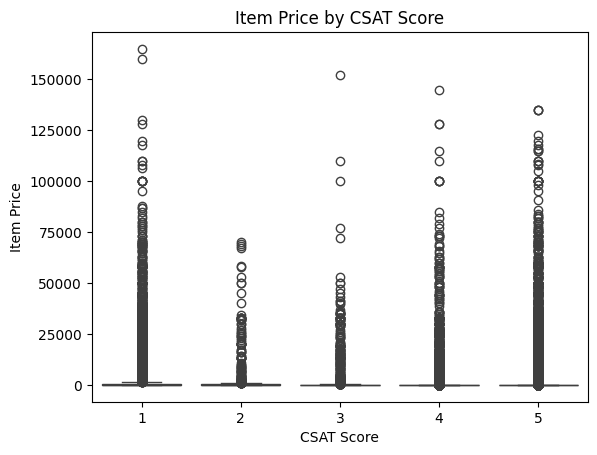

In [30]:
# Chart - 7 CSAT Score vs. Item Price
sns.boxplot(data=df_copy, x='CSAT Score', y='Item_price')
plt.title('Item Price by CSAT Score')
plt.xlabel('CSAT Score')
plt.ylabel('Item Price')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to analyze the relationship between item price and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

CSAT Scores are clustered around low price items and there are a few negative CSATs for high priced products.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low priced items have more positive scores indicating positive customer experience.
A few high priced items having low CSAT scores is concerning and might lead to negative growth.

#### Chart - 8

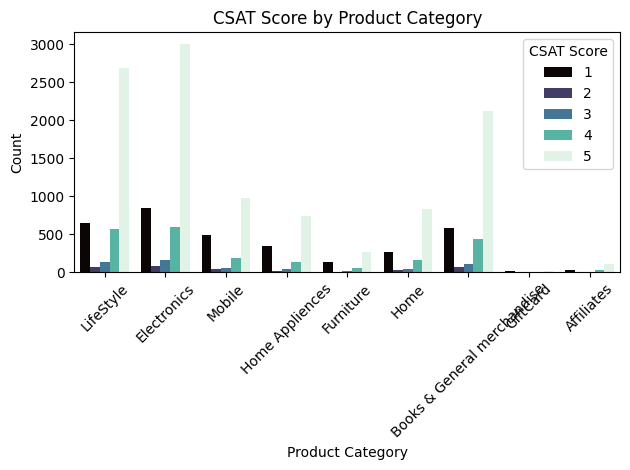

In [31]:
# Chart - 8 CSAT vs Product Category
filtered_df = df_copy[df_copy['Product_category'] != 'Not available'] # To ignore the "Not available" product category
sns.countplot(data=filtered_df, x='Product_category', hue='CSAT Score', palette='mako')
plt.title('CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to spot underperforming product lines.

##### 2. What is/are the insight(s) found from the chart?

Electronics is a product category with the most positive feedbacks along with the most complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers are more satisfied than dissatisfied for all the product categories.

It is crucial to identify the key concerns for each product category or it will impact the customer experience negatively.

#### Chart - 9

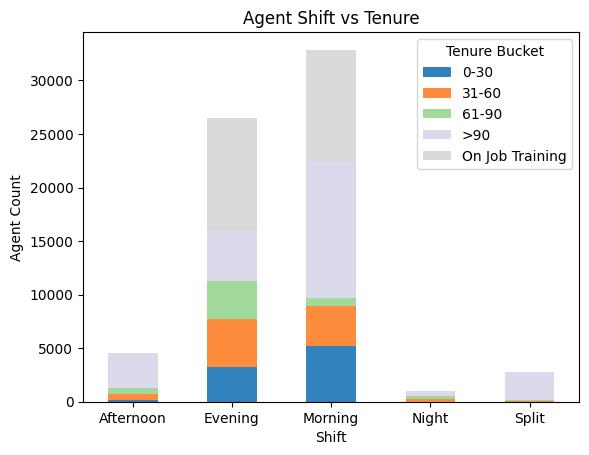

In [32]:
# Chart - 9 Agent Shift vs Tenure Bucket
pd.crosstab(df_copy['Agent Shift'], df_copy['Tenure Bucket']).plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Agent Shift vs Tenure')
plt.xlabel('Shift')
plt.ylabel('Agent Count')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

I used this chart to understand shift patterns vs experience.

##### 2. What is/are the insight(s) found from the chart?

Morning and evening shifts have more agents than the other shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As analyzed in Chart-4, morning and evening shifts are the busiest shifts and hence these shifts having more number of agents indicates that the resources are rightly managed and issues are being handled more effectively.

More number of trainees in the morning and evening shift might lead to customer dissatisfaction due to their lack of experience.

#### Chart - 10

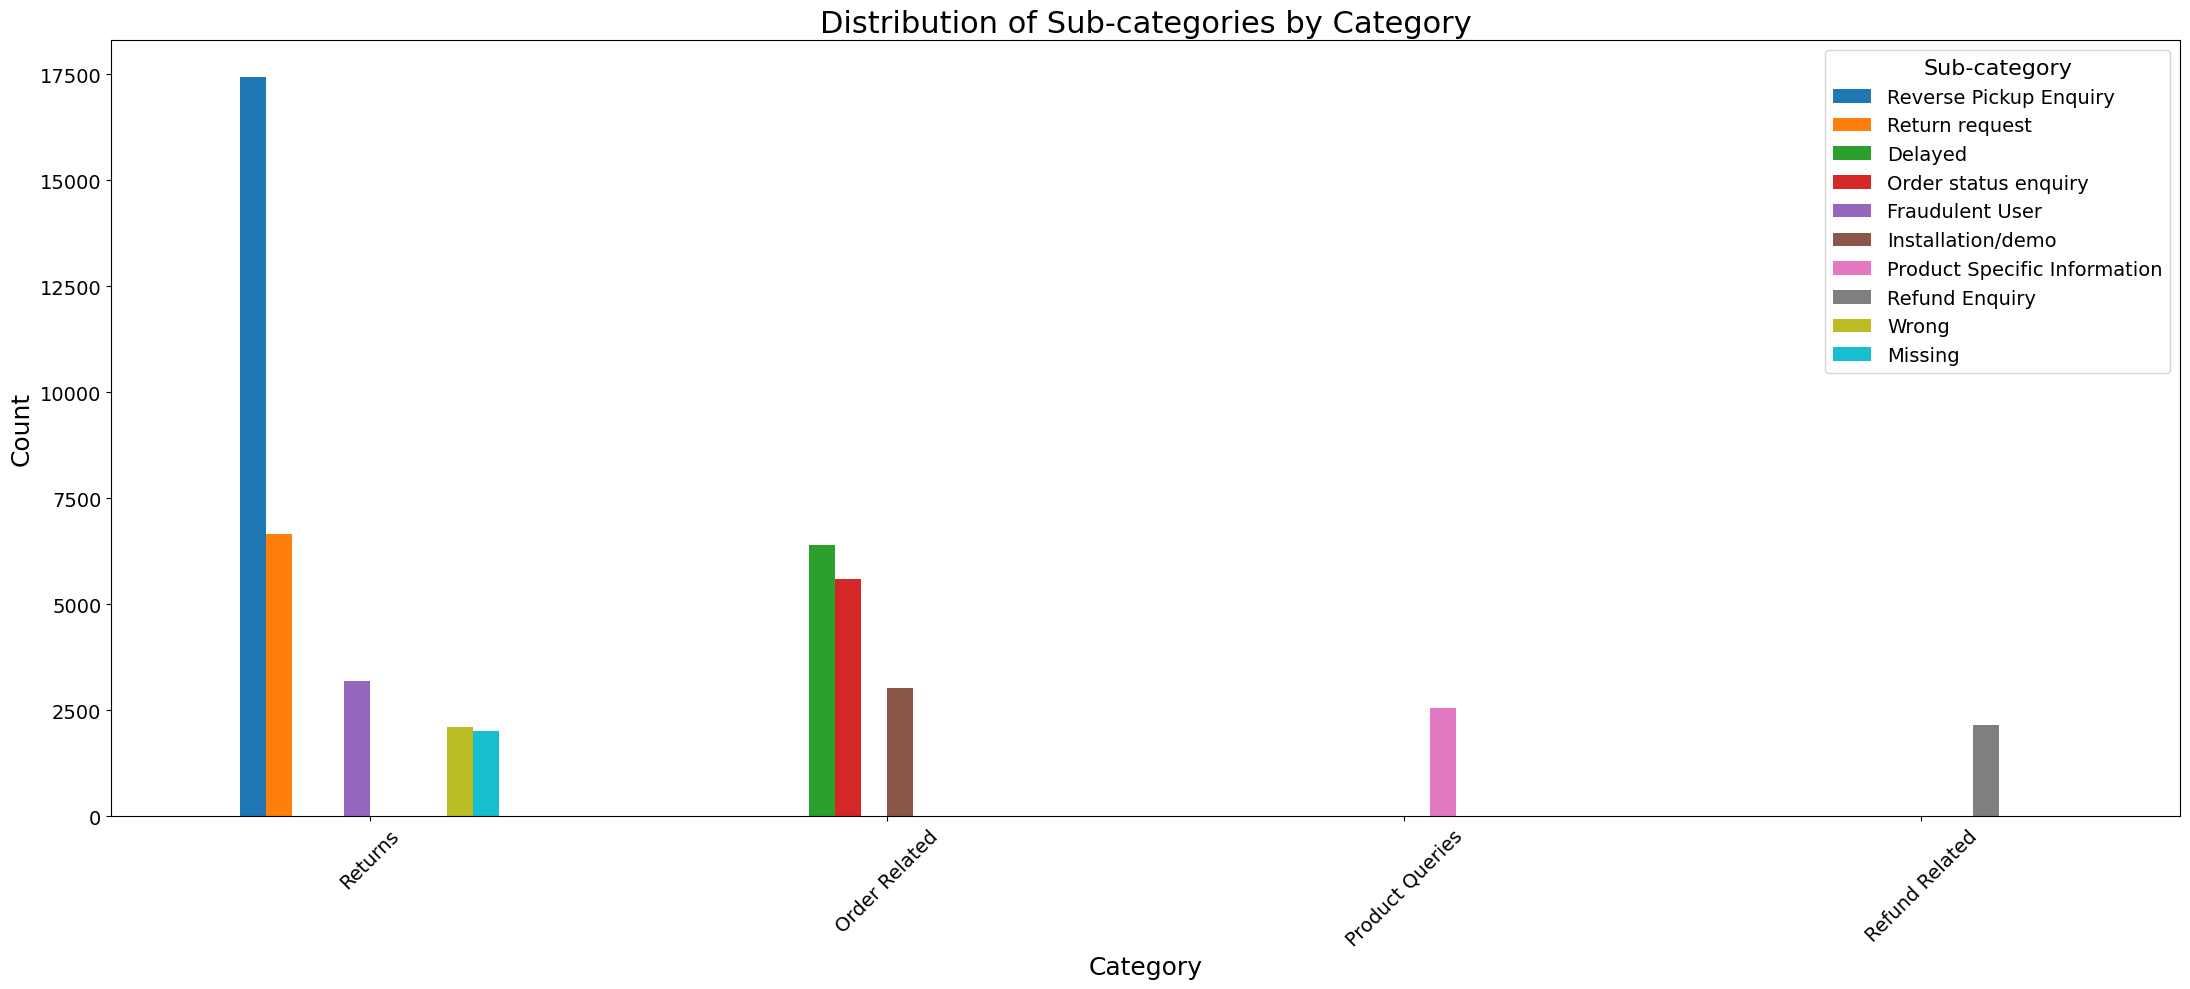

In [33]:
# Chart - 10 Sub-category Distribution by Category
category_sub_category_distribution = df_copy.groupby('category')['Sub-category'].value_counts().nlargest(10)
category_sub_category_distribution.unstack().plot(kind='bar', stacked=False, figsize=(22, 10))
plt.xlabel('Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Sub-categories by Category', fontsize=22)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sub-category', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to visualize how different sub-categories are distributed across each main category.

##### 2. What is/are the insight(s) found from the chart?

This chart helps identify dominant or underrepresented sub-categories within each category, which point to focused or neglected issue types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Key problems can be identified and resolved to improve customer experience.

High number of return requests indicate negative customer experience.

#### Chart - 11

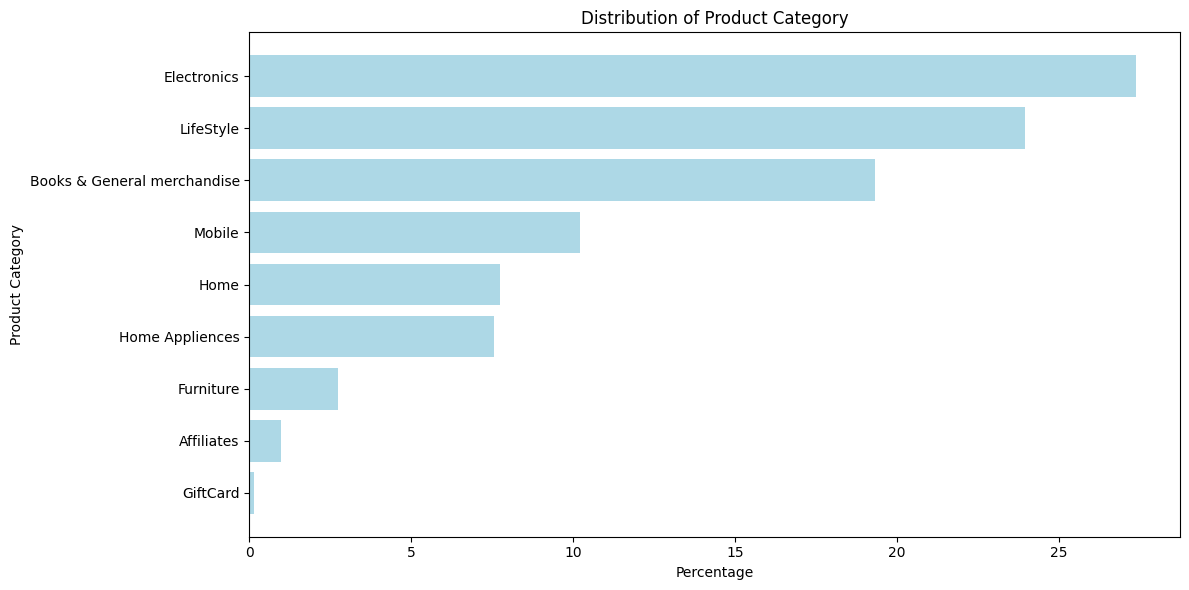

In [34]:
# Chart - 11 Distribution of Product Categories
product_category_dist = df_copy['Product_category'].value_counts()
# Filtering out 'Not Available'
product_category_dist = product_category_dist[product_category_dist.index != 'Not available']
# Calculating the percentage distribution
percentage_distribution = (product_category_dist / product_category_dist.sum()) * 100
percentage_distribution = percentage_distribution.sort_values(ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(percentage_distribution.index, percentage_distribution, color='lightblue')
plt.grid(False)
plt.ylabel('Product Category')
plt.xlabel('Percentage')
plt.title('Distribution of Product Category')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have used this chart to illustrate the percentage distribution of each product category.

##### 2. What is/are the insight(s) found from the chart?

Electronics, Lifestyle, and Books & General Merchandise contribute the highest share of product categories handled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominant categories can be prioritized for better service quality, inventory planning, and marketing strategies to drive even more customer engagement.

Other categories having a significantly less share might indicate customer dissatisfaction.

#### Chart - 12

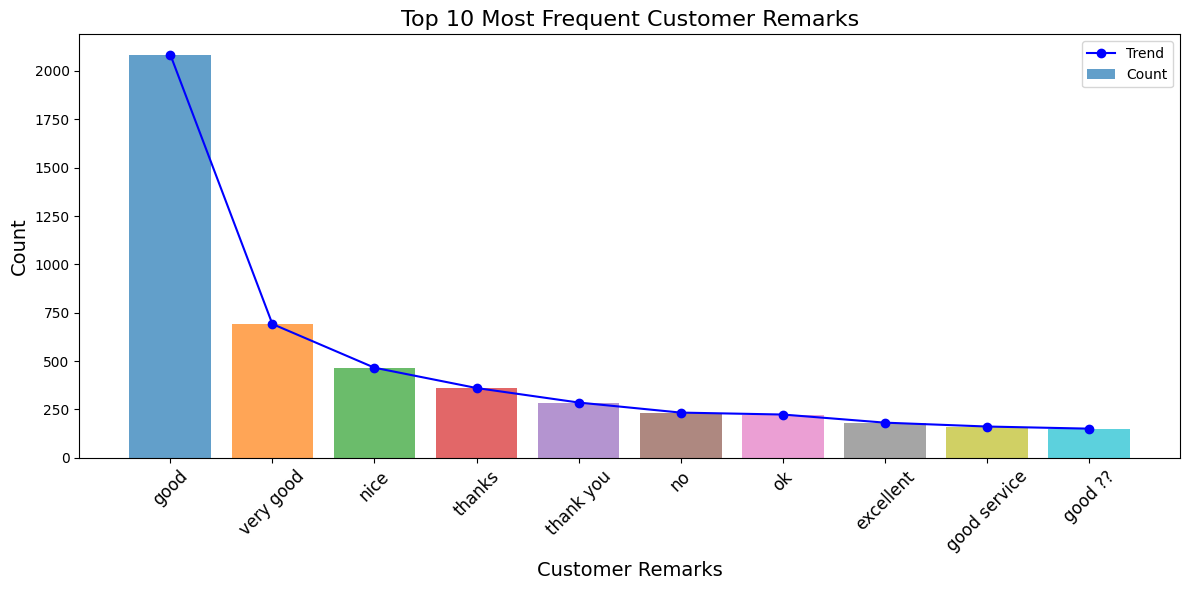

In [35]:
# Chart - 12 Top 10 Most Used Customer Remarks
cleaned_remarks = df_copy['Customer Remarks'].value_counts()
cleaned_remarks = cleaned_remarks[cleaned_remarks.index != 'no remark']
top_cleaned_remarks = cleaned_remarks.nlargest(10) # Getting top 10 remarks
colors = plt.cm.get_cmap('tab10', len(top_cleaned_remarks)).colors
plt.figure(figsize=(12, 6))
plt.bar(top_cleaned_remarks.index, top_cleaned_remarks, color=colors, alpha=0.7, label='Count')
plt.plot(top_cleaned_remarks.index, top_cleaned_remarks, marker='o', color='blue', label='Trend')
plt.xlabel('Customer Remarks', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Most Frequent Customer Remarks', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to explore the most common customer remarks.

##### 2. What is/are the insight(s) found from the chart?

Most of the common remarks are good indicating
positive customer experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most customer remarks indicate positive customer experience.

Less frequent remarks like "excellent" and "good service" could suggest that customers may not be fully satisfied.

#### Chart - 13

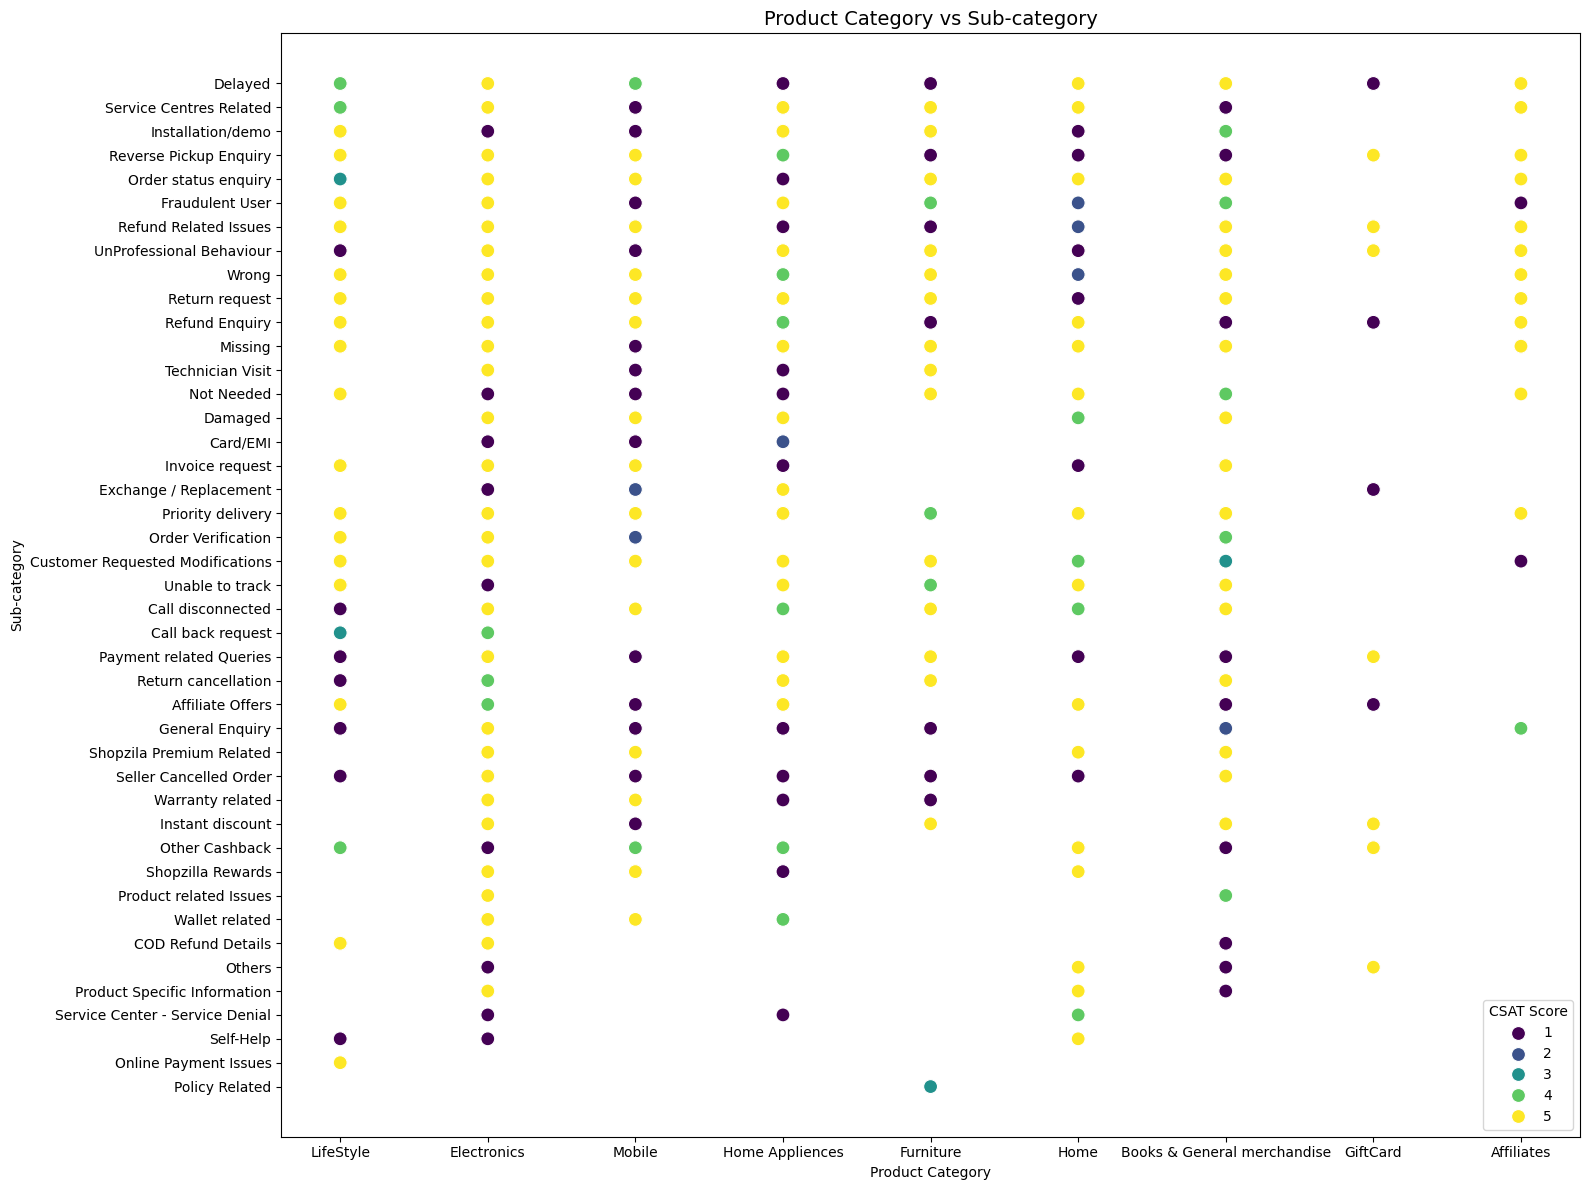

In [36]:
# Chart - 13 Product Cateogry vs Sub Category
# Filtering out "Not available" entries from Product_category
filtered_df_copy = df_copy[(df_copy['Product_category'] != 'Not available')]
plt.figure(figsize=(16, 12))
sns.scatterplot(data=filtered_df_copy, x='Product_category', y='Sub-category', hue='CSAT Score', palette='viridis', s=100)
plt.title('Product Category vs Sub-category',  fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Sub-category')
plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot allows us to visualize how different sub-categories are distributed across product categories, while also reflecting the CSAT scores through color

##### 2. What is/are the insight(s) found from the chart?

For Electronics, the CSAT scores are good for most of the sub categories.

For Mobile, the CSAT scores are bad for many sub categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis helps to identify and pin point the problems faced in each product category. The problem sub categories indicating positive CSAT scores indicate better customer experience.

Low CSAT Scores for many product categories/ problem sub categories might indicate service issues.




#### Chart - 14

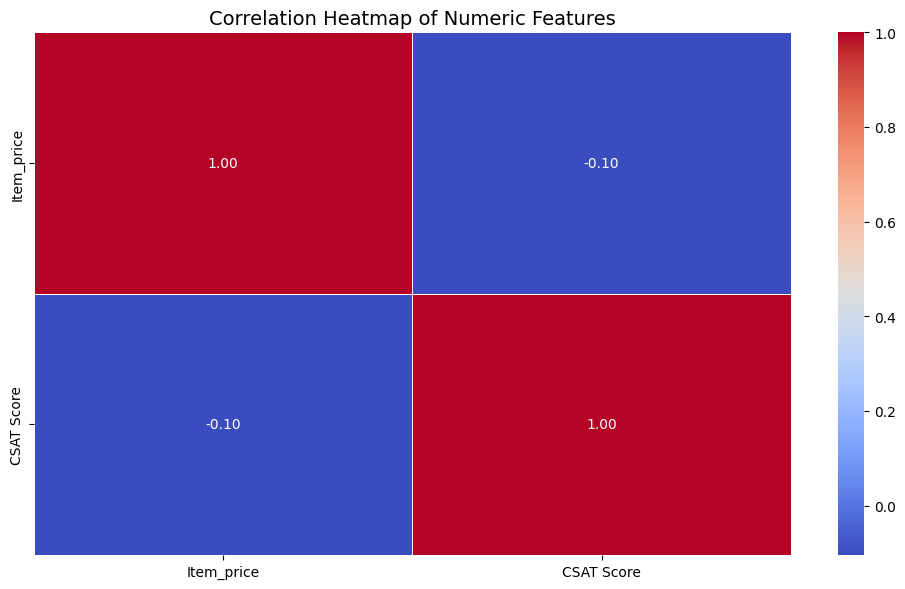

In [37]:
# Chart - 14 Correlation Heatmap
numeric_features = df_copy.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart to visually understand the linear relationship between customer satisfaction CSAT Score and Item_price.

##### 2. What is/are the insight(s) found from the chart?

There is a very weak negative correlation (-0.1) between Item_price and CSAT Score, meaning that as item price increases, customer satisfaction tends to decrease slightly, but the relationship is not strong.

#### Chart - 15

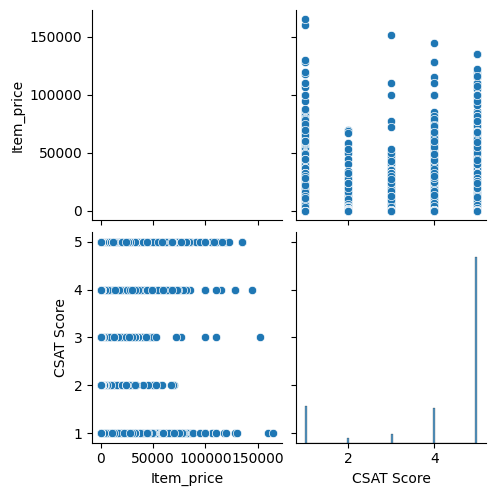

In [38]:
# Chart - 15 Pair Plot
sns.pairplot(df_copy)
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot helps visualize pairwise relationships and distributions between numerical variables. It's useful to detect trends, correlations, and outliers across multiple features at once.



##### 2. What is/are the insight(s) found from the chart?

The pair-plot chart does not reveals any strong relationship between the variables.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1
#### **Shift vs CSAT Score**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H₀)**: There is no significant difference in the average CSAT Score between Morning and Evening shifts.
* **Alternate Hypothesis (H₁)**: There is a significant difference in average CSAT Score between Morning and Evening shifts.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
# Filtering data for Morning and Evening shifts only
morning_scores = df_copy[df_copy['Agent Shift'] == 'Morning']['CSAT Score']
evening_scores = df_copy[df_copy['Agent Shift'] == 'Evening']['CSAT Score']

# Performing independent t-test
t_stat, p_val = ttest_ind(morning_scores, evening_scores, nan_policy='omit')
print("P-Value:", p_val)

P-Value: 2.0911027996376923e-14


##### Which statistical test have you done to obtain P-Value?

I have done Independent t-test to obtain the P-Value.

##### Why did you choose the specific statistical test?

I have used a t-test because we are comparing the means of a continuous variable (CSAT Score) between two independent groups (Morning and Evening shift). This is a classic case for applying a two-sample independent t-test.

### Hypothetical Statement - 2
#### **Product Category vs CSAT Score**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H₀)**: The average CSAT Score is the same across all Product Categories.

* **Alternate Hypothesis (H₁)**: At least one Product Category has a significantly different average CSAT Score.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
# Filtering out 'Not available' category
df_filtered = df_copy[df_copy['Product_category'] != 'Not available']

# Grouping CSAT scores by product categories
grouped_scores = [group['CSAT Score'].values for name, group in df_filtered.groupby('Product_category')]

# Performing one-way ANOVA
f_stat, p_val = f_oneway(*grouped_scores)
print("P-Value:", p_val)

P-Value: 3.161710955116098e-36


##### Which statistical test have you done to obtain P-Value?

I have used One-Way ANOVA (Analysis of Variance) to obtain the P_Value.

##### Why did you choose the specific statistical test?

We have more than two independent groups (Product Categories) and are testing for mean differences in a numerical variable (CSAT Score). So, ANOVA is the appropriate choice here.

### Hypothetical Statement - 3
#### **Item Price vs CSAT Score**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H₀)**: There is no significant correlation between Item Price and CSAT Score.

* **Alternate Hypothesis (H₁)**: There is a significant correlation between Item Price and CSAT Score.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
# Dropping NA values for correlation
subset = df_copy[['Item_price', 'CSAT Score']].dropna()

# Performing Pearson correlation
corr_coeff, p_val = pearsonr(subset['Item_price'], subset['CSAT Score'])
print("P-Value:", p_val)

P-Value: 9.291825546451965e-164


##### Which statistical test have you done to obtain P-Value?

I have used Pearson Correlation Coefficient to obtain the P-Value.

##### Why did you choose the specific statistical test?

We are testing the linear relationship between two continuous variables (Item Price and CSAT Score), so Pearson's correlation is the correct statistical method.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
print(df_copy.isnull().sum())

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Customer Remarks            0
Order_id                    0
order_date_time         50461
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Customer_City               0
Product_category            0
Item_price                  0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64


In [43]:
# Imputing the missing order_date_time based on the median time per survey response date
df_copy['order_date_time'] = pd.to_datetime(df_copy['order_date_time'], errors='coerce')
df_copy['Survey_response_Date'] = pd.to_datetime(df_copy['Survey_response_Date'], errors='coerce')
df_copy['order_date_time'] = df_copy.groupby('Survey_response_Date')['order_date_time'].transform(lambda x: x.fillna(x.median()))

# Extracting date/time features
df_copy['year'] = df_copy['order_date_time'].dt.year
df_copy['month_num'] = df_copy['order_date_time'].dt.month
df_copy['day_num'] = df_copy['order_date_time'].dt.day
df_copy['hour'] = df_copy['order_date_time'].dt.hour
df_copy['minute'] = df_copy['order_date_time'].dt.minute

In [44]:
# Checking for null values again
print(df_copy.isnull().sum())

Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
year                    0
month_num               0
day_num                 0
hour                    0
minute                  0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There were missing values in the order_date_time column. Instead of simply dropping the missing entries or filling them with a generic value, I have used **group-wise median imputation**. Specifically, I filled the missing values based on the median order_date_time for each Survey_response_Date.

I chose this method because it helps preserve the natural relationship between the survey response date and the order date, which might be important for understanding customer behavior. Also, using median ensures that outliers do not affect the imputed values much.

### 2. Handling Outliers

In [45]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Checking the shape before and after removing outliers
print("Before removing outliers:", df_copy.shape)

# Remove outliers in-place from df_copy
df_copy = remove_outliers_iqr(df_copy, 'Item_price')

print("After removing outliers:", df_copy.shape)

Before removing outliers: (67675, 24)
After removing outliers: (51534, 24)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the IQR method to find and handle outliers in the data. This method looks at the middle part of the data and finds values that are much smaller or bigger than most others.
I used this method because:
* It's easy to understand and works well even if the data isn't perfectly normal.

* It helps find unusual values that might mess up the analysis or model.

* Removing these extreme values makes the results more reliable and accurate.



### 3. Categorical Encoding

In [46]:
# Ordinal encoding for Tenure Bucket
tenure_order = ['On Job Training', '0-30', '31-60', '61-90', '>90']
df_copy['Tenure Bucket'] = pd.Categorical(df_copy['Tenure Bucket'], categories=tenure_order, ordered=True)
df_copy['Tenure Bucket Encoded'] = df_copy['Tenure Bucket'].cat.codes

# Binary encoding for Agent Shift
binary_encoder = ce.BinaryEncoder(cols=['Agent_name', 'Supervisor', 'Manager', 'Agent Shift'], drop_invariant=True)
df_copy = binary_encoder.fit_transform(df_copy)

# One-hot encoding for other nominal categorical columns
df_copy = pd.get_dummies(df_copy, columns=['channel_name', 'category', 'Sub-category', 'Product_category', 'Customer_City'], drop_first=True)

# Dropping the original Tenure Bucket column
df_copy.drop('Tenure Bucket', axis=1, inplace=True)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51534 entries, 0 to 85906
Columns: 501 entries, Unique id to Customer_City_YEOTAMAL
dtypes: bool(463), datetime64[ns](4), float64(1), int32(5), int64(24), int8(1), object(3)
memory usage: 36.8+ MB


In [48]:
df_copy.head()

,Unique id,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Item_price,Agent_name_0,Agent_name_1,...,Customer_City_VIJAYAWADA,Customer_City_VILLUPURAM,Customer_City_VIRAR,Customer_City_VISHAKHAPATNAM,Customer_City_W26,Customer_City_WANI,Customer_City_WEST DINAJPUR,Customer_City_WEST GODAVARI,Customer_City_YAMUNANAGAR,Customer_City_YEOTAMAL
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,no remark,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-07-23 18:43:00,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,no remark,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-07-23 18:43:00,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,200814dd-27c7-4149-ba2b-bd3af3092880,no remark,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-07-23 18:43:00,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,no remark,5aed0059-55a4-4ec6-bb54-97942092020a,2023-07-23 18:43:00,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,ba903143-1e54-406c-b969-46c52f92e5df,no remark,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-07-23 18:43:00,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Ordinal Encoding, Binary Encoding and One-Hot Encoding techniques for categorical encoding.

* Tenure Bucket is encoded as ordinal because it has a natural progression.

* Agent_name, Supervisor, Manager, Agent Shift are binary encoded to reduce dimensionality but still represent categories uniquely.

* One-hot encoding is applied to other nominal categories to avoid imposing any order.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [49]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 1. Expand Contraction

In [50]:
# Expand Contraction
def expand_contractions(text):
    return contractions.fix(text)

df_copy['clean_text'] = df_copy['Customer Remarks'].apply(expand_contractions)

#### 2. Lower Casing

In [51]:
# Lower Casing
df_copy['clean_text'] = df_copy['clean_text'].str.lower()

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
df_copy['clean_text'] = df_copy['clean_text'].str.replace(r'[^\w\s]', '', regex=True)

#### 4. Removing Stopwords & White spaces

In [53]:
# Remove Stopwords & White Spaces
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_whitespace(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df_copy['clean_text'] = df_copy['clean_text'].apply(remove_stopwords_and_whitespace)

#### 5. Text Vectorization

In [54]:
# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=300)

# Apply TF-IDF only on 'clean_text'
tfidf_matrix = tfidf.fit_transform(df_copy['clean_text'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Drop the original text columns
df_copy = df_copy.drop(columns=['Customer Remarks', 'clean_text'])

# Reset index to merge
df_copy = df_copy.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)

# Combine original features with TF-IDF features
df_final = pd.concat([df_copy, tfidf_df], axis=1)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51534 entries, 0 to 51533
Columns: 800 entries, Unique id to yet
dtypes: bool(463), datetime64[ns](4), float64(301), int32(5), int64(24), int8(1), object(2)
memory usage: 153.9+ MB


In [56]:
df_final.head()

,Unique id,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Item_price,Agent_name_0,Agent_name_1,Agent_name_2,...,well,within,without,work,working,worst,would,wrong,yes,yet
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-07-23 18:43:00,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-07-23 18:43:00,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-07-23 18:43:00,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,5aed0059-55a4-4ec6-bb54-97942092020a,2023-07-23 18:43:00,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ba903143-1e54-406c-b969-46c52f92e5df,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-07-23 18:43:00,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Feature Selection

In [57]:
# Dropping unnecessary columns
columns_to_drop = ['Unique id', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
df_final = df_final.drop(columns=columns_to_drop)

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51534 entries, 0 to 51533
Columns: 794 entries, Item_price to yet
dtypes: bool(463), float64(301), int32(5), int64(24), int8(1)
memory usage: 151.6 MB


##### What all feature selection methods have you used  and why?

I have dropped the Unique id and Order_id columns because they're just identifiers that are unique to each record — they don't actually tell us anything useful about the customer's experience or satisfaction. Including them in the model would only add noise without helping with predictions.

I also removed the other datetime columns. Since I've already extracted the key parts like day and month from the order_date_time, we're not really losing any valuable information. Those extracted features should be enough to capture any trends related to when the interaction happened, which is what actually matters for predicting the CSAT score.



##### Which all features you found important and why?

All features except Unique id, Order_id and the datetime format columns are crucial for CSAT Score Prediction because they help us understand customer behavior and their overall experience which will be useful in the prediction of CSAT Scores.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes the data needs to be transformed, since the dataset contains numerical features with different scales, **data scaling** is necessary to standardize the range for better model performance.

### 7. Data Scaling

In [59]:
# Scaling your data
# Identifying numerical columns with more than 10 unique values
num_columns = [col for col in df_final.columns if df_final[col].dtype in ['int64', 'float64', 'int32', 'int8'] and df_final[col].nunique() > 10]

# Initializing the scaler
scaler = StandardScaler()

# Applying standard scaling to these columns
df_final[num_columns] = scaler.fit_transform(df_final[num_columns])


##### Which method have you used to scale you data and why?

I have used ```StandardScaler``` for scaling the data because it normalizes the data in a way that keeps it balanced and ready for modeling.

### 8. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Defining features and target
X = df_final.drop(['CSAT Score'], axis=1)
y = df_final['CSAT Score']

# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (41227, 793)
Test shape: (10307, 793)


##### What data splitting ratio have you used and why?

I've used an 80:20 data splitting ratio, meaning 80% of the data is used for training the model and 20% for testing.
* 80% training data ensures the model has enough data to learn patterns effectively.

* 20% test data is sufficient to evaluate the model's generalization on unseen data.

### 9. Handling Imbalanced Dataset

In [61]:
counter_before = Counter(y_train)
print("Before Handling Imbalanced data:", counter_before)

Before Handling Imbalanced data: Counter({5: 29219, 4: 5492, 1: 4761, 3: 1202, 2: 553})


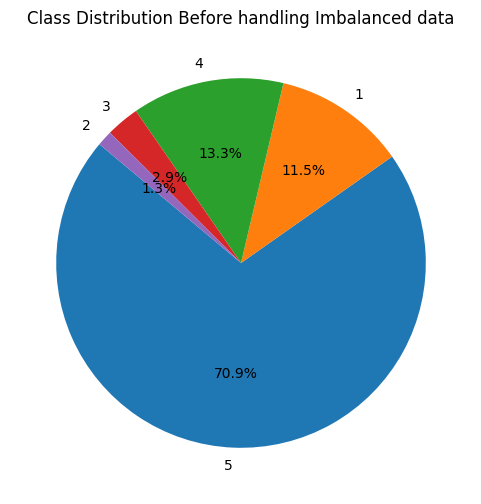

In [62]:
plt.figure(figsize=(6,6))
plt.pie(counter_before.values(), labels=counter_before.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Before handling Imbalanced data')
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

As seen in the pie chart above, the dataset is clearly imbalanced. The class with score 5 makes up the majority, while scores 2 and 3 are severely underrepresented.

In [63]:
# Handling Imbalanced Dataset
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

In [64]:
# Class distribution after Handling Imbalanced Data
counter_after = Counter(y_train_bal)
print("After Handling Imbalanced Data:", counter_after)

After Handling Imbalanced Data: Counter({5: 29219, 1: 29219, 4: 29219, 3: 29219, 2: 29219})


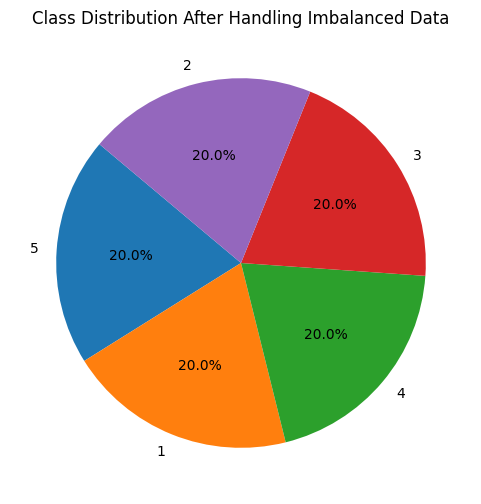

In [65]:
plt.figure(figsize=(6,6))
plt.pie(counter_after.values(), labels=counter_after.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution After Handling Imbalanced Data')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I chose RandomOverSampler because my target variable (CSAT Score) had a highly uneven distribution — with certain scores like 5 being much more frequent than others like 2 or 3.

RandomOverSampler is a simple and effective baseline approach to improve model performance on underrepresented classes.


## ***7. ML Model Implementation***

### ML Model - 1  Decision Tree

In [66]:
# ML Model - 1 Implementation
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
dt_model.fit(X_train, y_train)

# Predict on the model
y_pred = dt_model.predict(X_test)

Classification Report (Before Tuning):
              precision    recall  f1-score   support

           1       0.23      0.26      0.24      1173
           2       0.01      0.01      0.01       164
           3       0.07      0.08      0.07       320
           4       0.14      0.17      0.16      1315
           5       0.75      0.70      0.72      7335

    accuracy                           0.55     10307
   macro avg       0.24      0.25      0.24     10307
weighted avg       0.58      0.55      0.57     10307

Accuracy: 0.5532162607936354


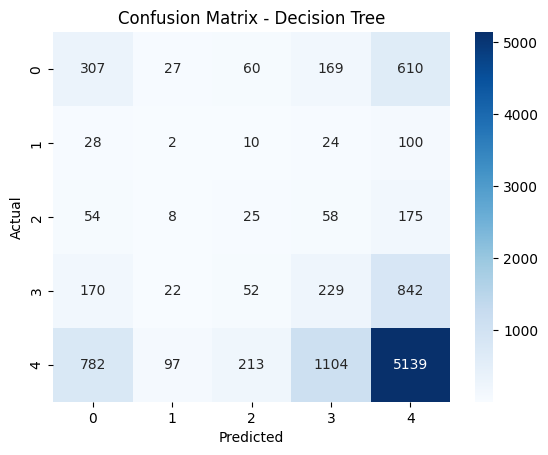

In [67]:
# Visualizing evaluation Metric Score chart
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Cross Validation
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.4076841  0.36150189 0.49218977 0.38042107 0.54259655]
Mean CV Accuracy: 0.4368786765605065


In [69]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


Classification Report (After Tuning):
              precision    recall  f1-score   support

           1       0.77      0.09      0.16      1173
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00       320
           4       0.00      0.00      0.00      1315
           5       0.72      1.00      0.84      7335

    accuracy                           0.72     10307
   macro avg       0.30      0.22      0.20     10307
weighted avg       0.60      0.72      0.61     10307

Accuracy: 0.7201901620258077


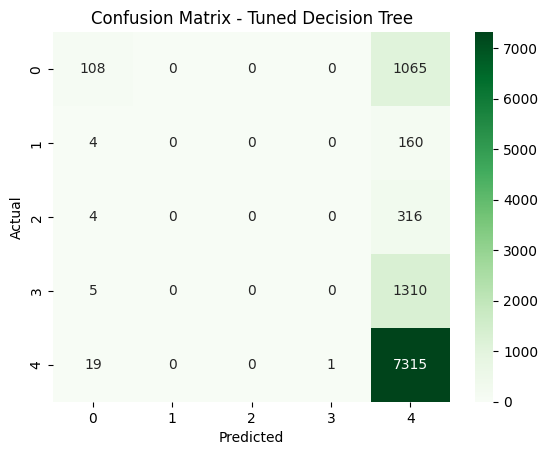

In [70]:
# Visualizing evaluation Metric Score chart
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
# Confusion Matrix
conf_mat_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used a Decision Tree Classifier to predict customer satisfaction levels.
Before tuning, the model had 55% accuracy but performed poorly on minority classes.
After tuning, accuracy improved to 72%, but it mainly predicted the majority class (class 5).
So, it looks better on paper, but it's not good at detecting less frequent classes.



#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search with Cross-Validation to find the best combination of parameters.
It tries multiple parameter combinations and tests them using 5-fold cross-validation.
This ensures the selected model performs well on unseen data.
It's reliable and commonly used for improving model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there's an improvement in accuracy from 55% to 72% after tuning.
However, the tuned model mainly predicts class 5 and ignores others.
Precision, recall, and F1-scores for minority classes actually dropped and the classwise performance is affected.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy gives a good overall view of model performance and shows the model is improving with tuning.

Precision helps ensure that when we predict a customer is satisfied or not, we're mostly right — reducing false alarms.

Recall shows how many true customer satisfaction levels we're able to correctly identify — higher recall means fewer missed insights.

F1-score balances precision and recall, helping us evaluate both correctness and coverage — very useful when handling multiple satisfaction levels.

### ML Model - 2 Random Forest

In [71]:
# ML Model - 2 Implementation
rf_model = RandomForestClassifier(random_state=42)
# Fit the Algorithm
rf_model.fit(X_train, y_train)
# Predict on the model
rf_model_pred = rf_model.predict(X_test)

Classification Report (Before Tuning):
              precision    recall  f1-score   support

           1       0.53      0.21      0.30      1173
           2       0.00      0.00      0.00       164
           3       0.04      0.01      0.01       320
           4       0.15      0.03      0.05      1315
           5       0.73      0.95      0.83      7335

    accuracy                           0.71     10307
   macro avg       0.29      0.24      0.24     10307
weighted avg       0.60      0.71      0.63     10307

Accuracy: 0.7052488599980595


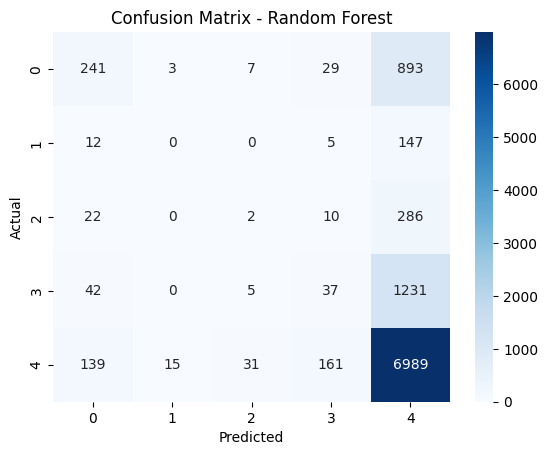

In [72]:
# Visualizing evaluation Metric Score chart
print("Classification Report (Before Tuning):")
print(classification_report(y_test, rf_model_pred))
print("Accuracy:", accuracy_score(y_test, rf_model_pred))
# Confusion Matrix
conf_mat = confusion_matrix(y_test, rf_model_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
# Cross Validation
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.58038226 0.56699331 0.71068206 0.55680605 0.71579662]
Mean CV Accuracy: 0.626132061640115


In [74]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'criterion': ['gini']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Classification Report (After Tuning):
              precision    recall  f1-score   support

           1       1.00      0.03      0.05      1173
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00       320
           4       0.00      0.00      0.00      1315
           5       0.71      1.00      0.83      7335

    accuracy                           0.71     10307
   macro avg       0.34      0.21      0.18     10307
weighted avg       0.62      0.71      0.60     10307

Accuracy: 0.7146599398467062


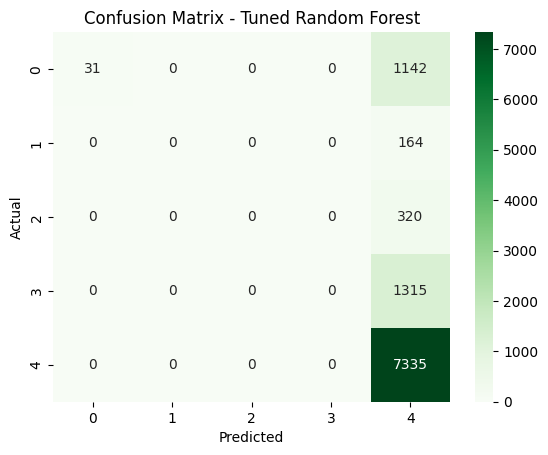

In [75]:
# Visualizing evaluation Metric Score chart
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
# Confusion Matrix
conf_mat_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used a Random Forest Classifier, which is an ensemble of decision trees that improves stability and accuracy.
Before tuning, the model achieved 70.5% accuracy, with strong performance on class 5 and limited performance on other classes.
After tuning, accuracy slightly improved to 71.4%, but most predictions were still focused on class 5.
This shows the model is solid for majority class detection but could benefit from better handling of class imbalance.


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search with Cross-Validation to find the best parameters for the Random Forest model.
It tests different combinations of parameters to pick the one that works best across folds.
This method helps improve generalization and reduces the risk of overfitting.
It's a dependable way to get better model performance without guesswork.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was a slight improvement in accuracy from 70.5% to 71.4% after tuning.
However, precision and recall for minority classes remained low, similar to the Decision Tree model.
The overall performance became slightly more stable but still biased toward the majority class.
So, accuracy went up, but there's room for improvement in class-wise prediction.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy shows the model is doing well overall, especially for predicting satisfied customers.

Precision ensures we don't wrongly assume customers are satisfied when they're not — useful in targeting follow-ups.

Recall helps us identify all unsatisfied customers — currently low, indicating some are being missed.

F1-score balances both and shows that while the model is strong on common cases, it needs improvement on rare ones.


### ML Model - 3 Logistic Regression

In [76]:
# ML Model - 3 Implementation
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the Model
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

Classification Report (Before Tuning):
              precision    recall  f1-score   support

           1       0.64      0.24      0.35      1173
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00       320
           4       0.18      0.00      0.01      1315
           5       0.74      0.99      0.84      7335

    accuracy                           0.73     10307
   macro avg       0.31      0.25      0.24     10307
weighted avg       0.62      0.73      0.64     10307

Accuracy: 0.7290191132240225


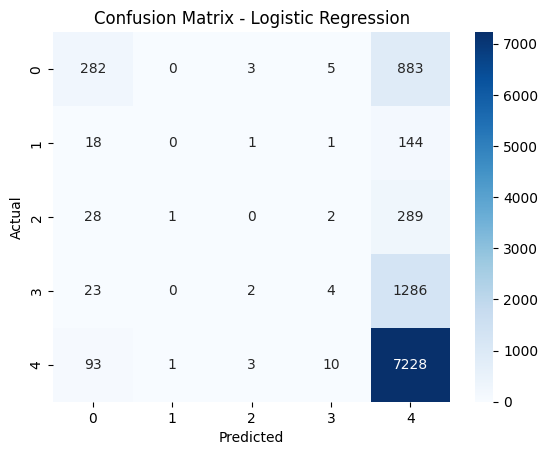

In [77]:
# Evaluation (Before Tuning)
print("Classification Report (Before Tuning):")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
# Cross-Validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.72882507 0.72465315 0.72814592 0.72572038 0.72976907]
Mean CV Accuracy: 0.7274227179405561


In [79]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=500, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X, y)

print("Best Parameters:", grid_search_lr.best_params_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Classification Report (After Tuning):
              precision    recall  f1-score   support

           1       0.66      0.26      0.37      1173
           2       0.50      0.01      0.01       164
           3       0.25      0.00      0.01       320
           4       0.25      0.00      0.00      1315
           5       0.74      0.99      0.84      7335

    accuracy                           0.73     10307
   macro avg       0.48      0.25      0.25     10307
weighted avg       0.65      0.73      0.64     10307

Accuracy: 0.7327059280100903


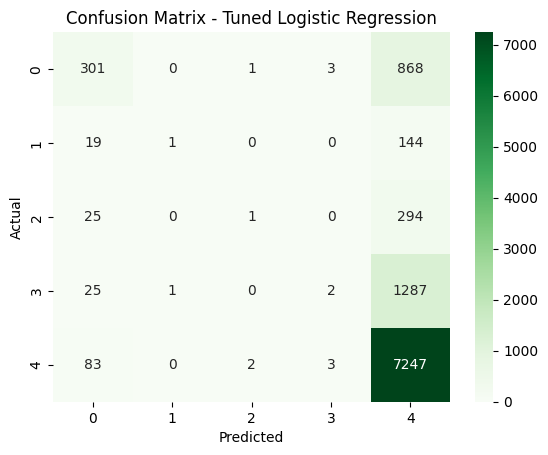

In [80]:
# Visualizing evaluation Metric Score chart
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_best_lr))
# Confusion Matrix
conf_mat_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression is a linear classification model that works well for problems where classes can be separated by a line or plane. Before tuning, the model achieved 73% accuracy, mostly driven by strong performance in predicting class 5. However, performance for other classes was weak, as shown by low precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning. This technique systematically checks all combinations of specified hyperparameters (like C, penalty, and solver) to find the best-performing one. It was chosen for its reliability and ability to improve model accuracy in a controlled and interpretable way.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning, the accuracy slightly improved from 72.9% to 73.3%. Class 1 showed better precision and recall, and other classes saw minor improvements. However, the model still struggles with minority classes. The weighted F1-score remained around 0.64, indicating modest but positive gains.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Precision tells us how many predicted positives are correct—important to avoid false alarms.

Recall shows how many actual positives were correctly found—important for catching all important cases.

F1-score balances both, giving a good single-number measure of performance.

Accuracy gives an overall success rate.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered Accuracy, Precision, Recall, and F1-score.

Accuracy helps measure overall correctness.

Precision is key for minimizing false positives (e.g., wrongly assuming a customer is satisfied).

Recall ensures we catch all actual positive cases (e.g., unhappy customers being flagged).

F1-score balances both and is ideal when classes are imbalanced.
These metrics give a complete picture of model performance, helping make better business decisions around customer satisfaction.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Logistic Regression model as the final one.
While Random Forest had decent accuracy, Logistic Regression gave slightly better balanced scores after tuning and was faster to run. It also performed better in identifying the most important class (class 5) and showed noticeable improvements in precision and recall after tuning. It's simple, interpretable, and gives business-friendly insights.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic Regression is a linear model that estimates the probability of each class based on input features. It assigns weights to features based on how strongly they influence the output class.
To understand feature importance, I used the model coefficients directly—larger absolute coefficient values indicate more influence.
For a more visual explanation, tools like SHAP (SHapley Additive exPlanations) or eli5 can show which features positively or negatively affect predictions. This helps businesses understand what drives customer satisfaction and where to focus improvements.

In [86]:
# Display feature importance for Logistic Regression
eli5.show_weights(best_lr_model, feature_names=X.columns.tolist())

# **Conclusion**

In conclusion, this project showed how we can use machine learning to better understand and predict customer satisfaction at Flipkart. By cleaning and exploring the data carefully, and trying out different models, we found useful patterns that can help improve customer service. The models gave us good insights into what affects satisfaction, which can guide Flipkart to make smarter decisions. In the future, using more data and newer techniques could make these predictions even better, helping Flipkart keep its customers happy.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***